## Signals in Time

In [1]:
using SignalAnalysis, SignalAnalysis.Units, Plots

In [2]:
cfpo = signal("data/cfpo1.wav");

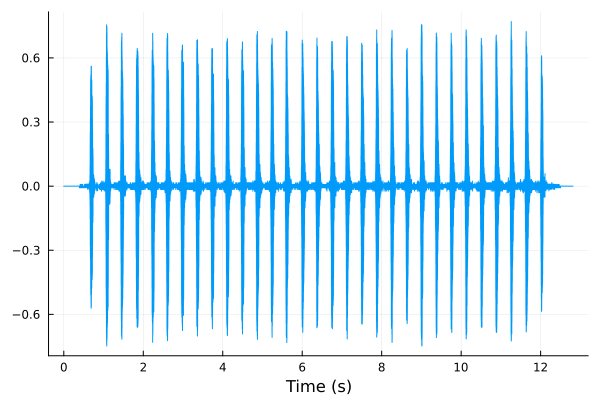

In [3]:
plot(cfpo)

In [4]:
framerate(cfpo)

8000.0f0

In [5]:
nframes(cfpo)

102528

In [6]:
duration(cfpo)

12.816f0

In [16]:
t₀ = 2.18s
one_chirp = plot(cfpo[t₀:t₀ + 0.2s]);

In [44]:
t₁ = 2.225s
chirp_zoomed = plot(cfpo[t₁:t₁+0.0101s]);

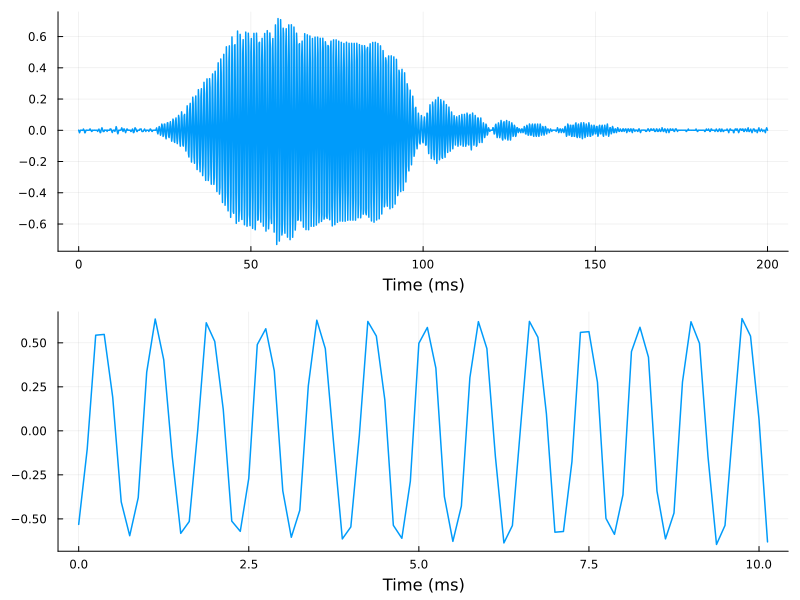

In [45]:
plot(one_chirp, chirp_zoomed
    ; layout=(2,1), size = ( 800, 600), linewidth = 1.5
)

# &#x1F4DA; References
- [ ] [Practical Julia: A Hands-On Introduction for Scientific Minds by Lee Phillips](https://nostarch.com/practical-julia)